In [24]:
# from typing import Iterator, List
from pathlib import Path
import requests
import io
import geopandas as gpd
import zipfile
import shutil

#LOCAL imports
from emission_explorer.Shapefile import subcountrymap      

In [25]:
# file_path_location = r"C:\Users\gio1r\Desktop\ECMWF_SoC_examples\DATA\shapefiles\PROCESSED_ne_50m_admin_0_countries\PROCESSED_ne_50m_admin_0_countries.shp"
# file_path_location2 = r"C:\Users\gio1r\Desktop\ECMWF_SoC_examples\DATA\shapefiles\PROCESSED_ne_50m_admin_0_countries.zip"
# shp = sbcm.shapefile.copy()
# shp.to_file(file_path_location)

# len(shp.columns), len(gpd.read_file(file_path_location).columns), len(gpd.read_file(file_path_location2).columns),'continent' in shp.columns,  'continent' in gpd.read_file(file_path_location).columns, 'continent' in gpd.read_file(file_path_location2).columns

In [26]:
url_to_download    = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_map_units.zip"#"https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_50m_admin_0_countries.zip"
# url_to_download    = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_map_subunits.zip"

file_path_location = "/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED_ne_110m_admin_0_map_units.zip"
# file_path_location = '/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED2_ne_10m_admin_0_map_subunits.geojson' 

# url_to_download    = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_map_subunits.zip"
# file_path_location = "/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED_ne_10m_admin_0_map_subunits.zip"
# url_to_download    = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip"
# file_path_location = "/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED_ne_10m_admin_1_states_provinces.zip"

sbcm = subcountrymap(file_path_location = file_path_location,
                     url_to_download = url_to_download,
                    add_continent=False)
sbcm
if Path(file_path_location).name == 'PROCESSED_ne_110m_admin_0_map_units.zip':
    fileout = Path('/home/esowc32/PROJECT/DATA/shapefiles/personalized_from_ne_110m_admin_0_map_units.geojson')
    if not fileout.exists():
        ss = sbcm.shapefile
        or_geom = ss[ss.NAME_EN == 'United States of America']
        usa           = or_geom.explode(index_parts=False).iloc[0:6].dissolve()
        alaska        = or_geom.explode(index_parts=False).iloc[6:11].dissolve()
        alaska.NAME_EN = ['Alaska']
        ss.drop(index = or_geom.index.values[0])
        ss = pd.concat([ss, usa, alaska])
        ss.index = np.arange(0, len(ss))
        ss.to_file(fileout, driver = 'GeoJSON')

In [27]:
sbcm = subcountrymap(file_path_location = file_path_location,
                     url_to_download = url_to_download,
                    add_continent=False)
ss = sbcm.shapefile
or_geom = ss[ss.NAME_EN == 'United States of America']
usa           = or_geom.explode(index_parts=False).iloc[0:6].dissolve()
alaska        = or_geom.explode(index_parts=False).iloc[6:11].dissolve()
alaska.NAME_EN = ['Alaska']
ss.drop(index = or_geom.index)
ss = pd.concat([ss, usa, alaska])
ss.index = np.arange(0, len(ss))
ss.to_file(fileout, driver = 'GeoJSON')

In [6]:
pols  =[pol for pol in or_geom.geometry.values[0].geoms]

In [14]:
import pandas as pd

<AxesSubplot:>

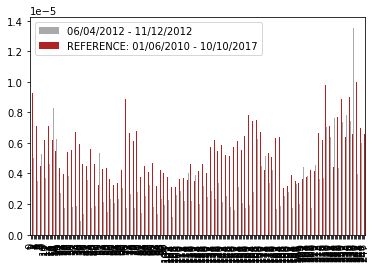

In [38]:
pd.read_csv("/home/esowc32/PROJECT/DATA/example_daily_averaged_data.csv").plot.bar(color = ['#A9A9A9','#B22222','y'])

In [12]:
ss.index

RangeIndex(start=0, stop=183, step=1)

In [33]:
all_cols = [f for f in or_geom.columns if f!='geometry']
usashp    = gpd.GeoDataFrame(or_geom[all_cols], geometry = [usa], crs = or_geom.crs)
alaskashp = 

,NAME_EN,continent,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,...,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,TLC_DIFF,geometry
4,United States of America,North America,Admin-0 map unit,1,2,United States of America,US1,1,2,Country,...,1,0.0,1.7,5.7,-97.482602,39.538479,1159321369,Q30,None,"MULTIPOLYGON (((-155.06226 19.85910, -154.8074..."


In [57]:
alaska = pols[6:11]
usa = pols[0:6]


.explore()

<AxesSubplot:>

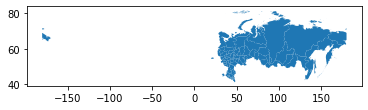

In [16]:
sbcm.shapefile[sbcm.shapefile['admin']=='Russia'].plot()

In [14]:
russia = sbcm.shapefile[sbcm.shapefile['adm0_a3']=='RUS']
[f for f in russia.columns]

['featurecla',
 'scalerank',
 'adm1_code',
 'diss_me',
 'iso_3166_2',
 'wikipedia',
 'iso_a2',
 'adm0_sr',
 'name',
 'name_alt',
 'name_local',
 'type',
 'type_en',
 'code_local',
 'code_hasc',
 'note',
 'hasc_maybe',
 'region',
 'region_cod',
 'provnum_ne',
 'gadm_level',
 'check_me',
 'datarank',
 'abbrev',
 'postal',
 'area_sqkm',
 'sameascity',
 'labelrank',
 'name_len',
 'mapcolor9',
 'mapcolor13',
 'fips',
 'fips_alt',
 'woe_id',
 'woe_label',
 'woe_name',
 'latitude',
 'longitude',
 'sov_a3',
 'adm0_a3',
 'adm0_label',
 'admin',
 'geonunit',
 'gu_a3',
 'gn_id',
 'gn_name',
 'gns_id',
 'gns_name',
 'gn_level',
 'gn_region',
 'gn_a1_code',
 'region_sub',
 'sub_code',
 'gns_level',
 'gns_lang',
 'gns_adm1',
 'gns_region',
 'min_label',
 'max_label',
 'min_zoom',
 'wikidataid',
 'name_ar',
 'name_bn',
 'name_de',
 'name_en',
 'name_es',
 'name_fr',
 'name_el',
 'name_hi',
 'name_hu',
 'name_id',
 'name_it',
 'name_ja',
 'name_ko',
 'name_nl',
 'name_pl',
 'name_pt',
 'name_ru',
 'na

In [ ]:
r

In [22]:
r = bb.dropna(subset = ['geometry'])
r.explore(column = 'NAME')


In [25]:
sbcm.file_path_location = Path('/home/esowc32/PROJECT/DATA/shapefiles/PROCESSED2_ne_10m_admin_0_map_subunits.geojson')

if not sbcm.file_path_location.exists():
    to_keep = ['SOV_A3', 'NAME', 'GEOUNIT', 'FORMAL_EN', 'geometry', 'continent']
    to_delete = []
    for f in sbcm.shapefile.columns:
        if f not in to_keep:
            to_delete.append(f)
            print(f"'{f}'")
    sbcm.shapefile.drop(columns = to_delete, inplace=True)
    sbcm.shapefile.to_file(sbcm.file_path_location, driver = 'GeoJSON')

In [4]:
def add_continent_to_shapefile(sbcm, centroid = True):
    """When workng with 'ne_110m_admin_0_map_units.zip', since it has no continent value per country, 
    it is added searching in the default geopandas map (also taken from naturalEarth)"""

    countries  = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).sort_values('name')
    countries.index = countries.name
    continents_roughly = countries.dissolve('continent')

    def int_with_continents(point):
        sel = continents_roughly[continents_roughly.intersects(point)]
        if len(sel)==0:
            print(f'1.PROBLEM, NO CONTINENT!')
            return 'PROBLEM'
        if len(sel)>1:
            print(f'1.PROBLEM, MORE continents_roughly!-  {sel.index}')
            return 'PROBLEM'
        if len(sel)==1:
            return sel.index.values[0]
        
    if centroid:
        sbcm.shapefile['continent'] = sbcm.shapefile.geometry.centroid.apply(int_with_continents)
    else:
        sbcm.shapefile['continent'] = sbcm.shapefile.geometry.apply(int_with_continents)
        
    def find_continent_iso(el):
        if el is not None:
            sel = countries[countries.iso_a3==el]
            if len(sel)==0:
                print(f'2.PROBLEM, NO CONTINENT! - {el}')
                return 'NOT ASSIGNED'
    #                     sel
            if len(sel)>1:
                print('PROBLEM, MORE continents_roughly!')
            if len(sel)==1:
                return sel.continent.values[0]
    def find_minimum_distance(point):
        return continents_roughly.iloc[continents_roughly.distance(point).argmin()].name
    
    sbcm.shapefile.loc[sbcm.shapefile.continent=='PROBLEM', 'continent'] = sbcm.shapefile.loc[sbcm.shapefile.continent=='PROBLEM', 'SU_A3'].apply(find_continent_iso)
    sbcm.shapefile.loc[sbcm.shapefile.continent=='NOT ASSIGNED', 'continent'] = sbcm.shapefile.loc[sbcm.shapefile.continent=='NOT ASSIGNED', 'geometry'].apply(find_minimum_distance)
    
    sbcm.shapefile['continent'] = sbcm.shapefile['continent'].values.astype(str)
    
    columns = ['NAME_EN','continent']+[f for f in sbcm.shapefile.columns if ('continent' not in f)&('NAME_' not in f)&('FCLASS_' not in f)&('geometry' not in f)] + ['geometry']
    sbcm.shapefile = sbcm.shapefile[columns]

In [5]:
# add_continent_to_shapefile(sbcm)
# def intersect_continent(geometry):
#     countries  = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).sort_values('name')
#     countries.index = countries.name
#     continents_roughly = countries.dissolve('continent')
    
add_continent_to_shapefile(sbcm, centroid = True)    


# sbcm.shapefile[sbcm.shapefile['continent']=='NOT ASSIGNED'].geometry.apply(intersect_continent)
# el1 = sbcm.shapefile[sbcm.shapefile['continent']=='NOT ASSIGNED'].geometry.values[0]

countries  = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).sort_values('name')
countries.index = countries.name
continents_roughly = countries.dissolve('continent')

/home/esowc32/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!
1.PROBLEM, NO CONTINENT!


/home/esowc32/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [6]:
%matplotlib widget

In [7]:
sbcm.shapefile.iloc[[0]].columns

Index(['NAME_EN', 'continent', 'featurecla', 'scalerank', 'LABELRANK',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE',
       ...
       'MIN_ZOOM', 'MIN_LABEL', 'MAX_LABEL', 'LABEL_X', 'LABEL_Y', 'NE_ID',
       'WIKIDATAID', 'TLC_DIFF', 'continen_1', 'geometry'],
      dtype='object', length=108)

In [8]:
set(sbcm.shapefile.CONTINENT)

{'Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'Seven seas (open ocean)',
 'South America'}

In [9]:
pp1 = sbcm.shapefile.loc[sbcm.shapefile.continent=='NOT ASSIGNED'].iloc[[3]]

ax = pp1.plot()
continents_roughly.boundary.plot(ax=ax)
xlim,ylim,xlim2,ylim2 = pp1.iloc[0].geometry.buffer(3).bounds
ax.set_xlim(xlim,xlim2)
ax.set_ylim(ylim,ylim2)

IndexError: positional indexers are out-of-bounds

In [ ]:
# USE WIDGETS
import ipywidgets
cmbox1 = ipywidgets.Combobox(options=list(sbcm.continent_shapefile.index),
                             placeholder='COUNTRY/CONTINENT: Write down or choose',
                             description=" ",
                             layout={'width': 'initial','description_width': 'initial'})
list_countries = sbcm.shapefile.GEOUNIT.values

cmbox2 = ipywidgets.Combobox(options=list(list_countries),
                         placeholder='COUNTRY: Write down or choose',
                         description=" ",
                         layout={'width': 'initial','description_width': 'initial'})
# def create_cmbox2(change):
def create_cmbox2(continent):
    
#     if isinstance(change.new, str):
#         print(change.new)
#         continent = change.new
        list_countries = list(sbcm.shapefile[sbcm.shapefile.continent ==continent].GEOUNIT.values)
#         print(list_countries)
        cmbox2.options = list_countries
#         display(cmbox2)
#         return cmbox2


inte = ipywidgets.interactive(create_cmbox2, continent = cmbox1)
display(inte)
display(cmbox2)